In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [315]:
Lead_df = pd.read_csv('/Users/mymac/Downloads/Lead Scoring Assignment/Leads.csv')
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [316]:
Lead_df.shape

(9240, 37)

In [318]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [319]:
Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [320]:
Lead_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [321]:
#Converting the entire data into lower case

Lead_df = Lead_df.applymap(lambda s:s.lower() if type(s) == str else s)


In [322]:
#Replacing the NaN values with select as no option is selected

Lead_df = Lead_df.replace('select',np.nan)

In [323]:
Lead_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [324]:
#Deleting Records where there is only one unique value(duplicate data)

Lead_df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1,inplace=True)

In [325]:
#Deleting Prospect ID column as it has unique values
Lead_df.drop(['Prospect ID'],axis=1,inplace=True)

In [326]:
Lead_df.shape

(9240, 31)

In [327]:
Lead_df.isnull().sum()/len(Lead_df.index)

Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
How did you hear about X Education               0.784632
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Newspaper Article                                0.000000
X Education Fo

In [328]:
#Dropping Columns with greater than 35% Null Values
Lead_df.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score',
              'Asymmetrique Profile Score','Tags','Lead Quality'],axis=1,inplace=True)


In [329]:
Lead_df.shape

(9240, 25)

In [330]:
Lead_df.isnull().sum()/len(Lead_df.index)

Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
How did you hear about X Education               0.784632
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Newspaper Article                                0.000000
X Education Fo

In [331]:
#We have 7 columns were Null values are greater than 10 %
#Removing these columns will result in losing huge amount of data, hence we will assign 'na'(Not Available).
#If these columns come in the model, then we can drop those columns.

Lead_df['Country'] = Lead_df['Country'].fillna('na')
Lead_df['Specialization'] = Lead_df['Specialization'].fillna('na')
Lead_df['How did you hear about X Education'] = Lead_df['How did you hear about X Education'].fillna('na')
Lead_df['What is your current occupation'] = Lead_df['What is your current occupation'].fillna('na')
Lead_df['What matters most to you in choosing a course'] = Lead_df['What matters most to you in choosing a course'].fillna('na')
Lead_df['Lead Profile'] = Lead_df['Lead Profile'].fillna('na')
Lead_df['City'] = Lead_df['City'].fillna('na')


In [332]:
Lead_df.isnull().sum()/len(Lead_df.index)
#Now, the Null Values count is less than 2 %

Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.000000
Specialization                                   0.000000
How did you hear about X Education               0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Article                                0.000000
X Education Fo

In [333]:
Lead_df.Country.value_counts()

india                   6492
na                      2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [334]:
#Converting data in Country column to India, Not Available and Not in India

def countryLocation(country):
    location = ''
    if country=='india':
        location='india'
    elif country=='na':
        location='not available'
    else:
        location='not in india'
    return location

Lead_df['Country'] = Lead_df.apply(lambda x:countryLocation(x['Country']), axis = 1)
Lead_df['Country'].value_counts()

india            6492
not available    2461
not in india      287
Name: Country, dtype: int64

In [335]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

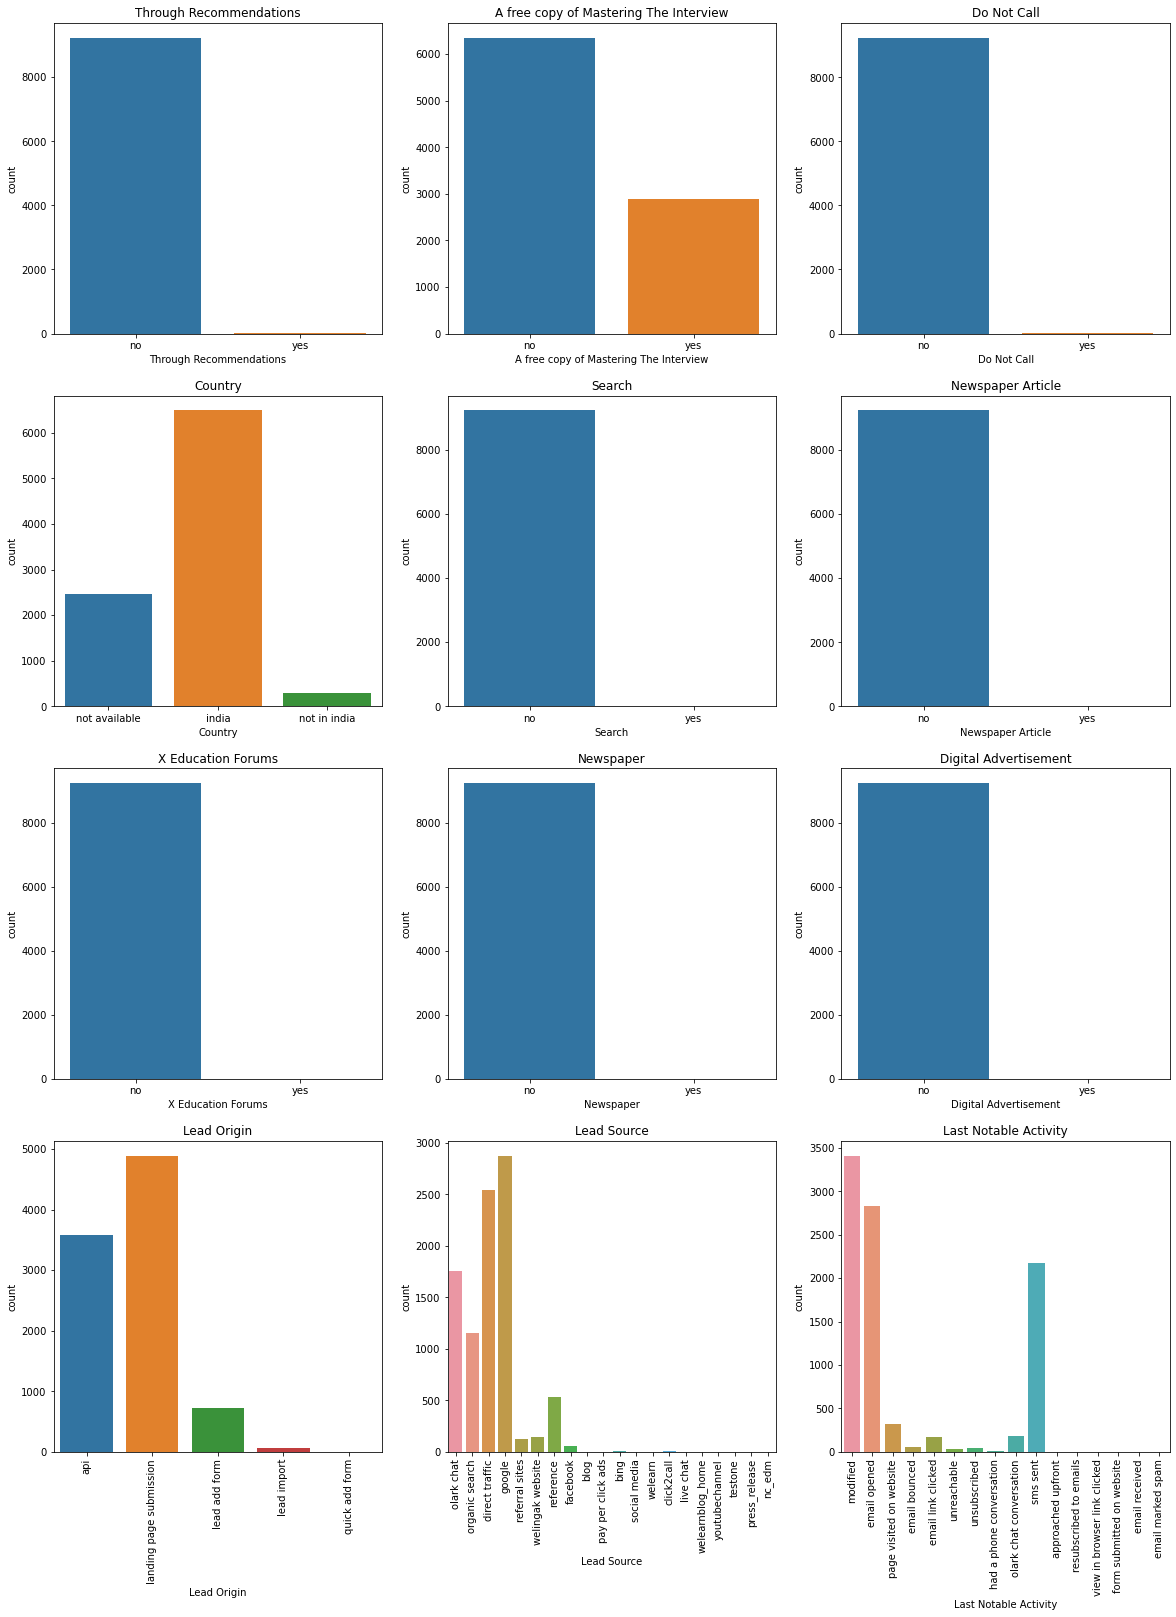

In [336]:
plt.figure(figsize = (20,40))

plt.subplot(6,3,1)
sns.countplot(Lead_df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,3,2)
sns.countplot(Lead_df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,3,3)
sns.countplot(Lead_df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,3,4)
sns.countplot(Lead_df['Country'])
plt.title('Country')

plt.subplot(6,3,5)
sns.countplot(Lead_df['Search'])
plt.title('Search')

plt.subplot(6,3,6)
sns.countplot(Lead_df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,3,7)
sns.countplot(Lead_df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,3,8)
sns.countplot(Lead_df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,3,9)
sns.countplot(Lead_df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,3,10)
sns.countplot(Lead_df['Lead Origin']).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(6,3,11)
sns.countplot(Lead_df['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')


plt.subplot(6,3,12)
sns.countplot(Lead_df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

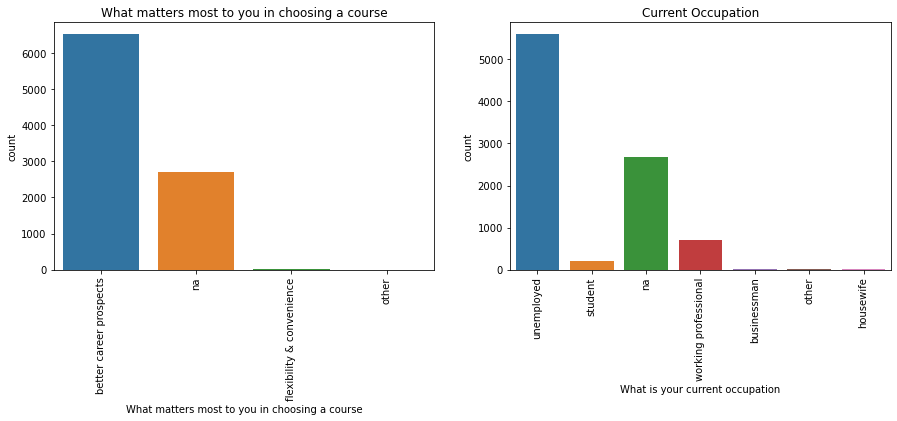

In [337]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.countplot(Lead_df['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(2,2,2)
sns.countplot(Lead_df['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

plt.show()

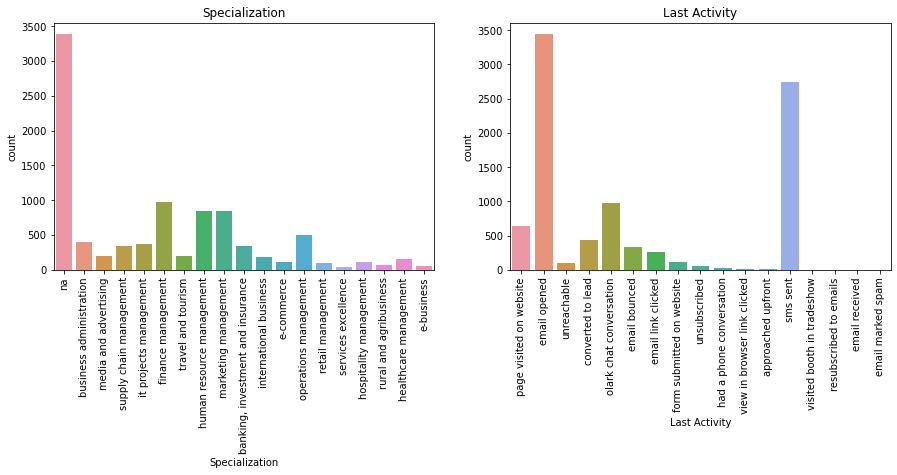

In [338]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.countplot(Lead_df['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(2,2,2)
sns.countplot(Lead_df['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.show()

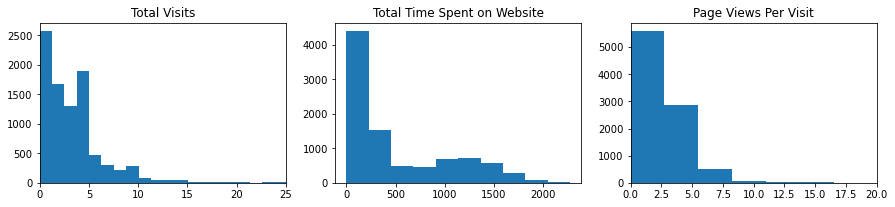

In [339]:
plt.figure(figsize = (15,10))
plt.subplot(3,3,1)
plt.hist(Lead_df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(3,3,2)
plt.hist(Lead_df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(3,3,3)
plt.hist(Lead_df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.show()

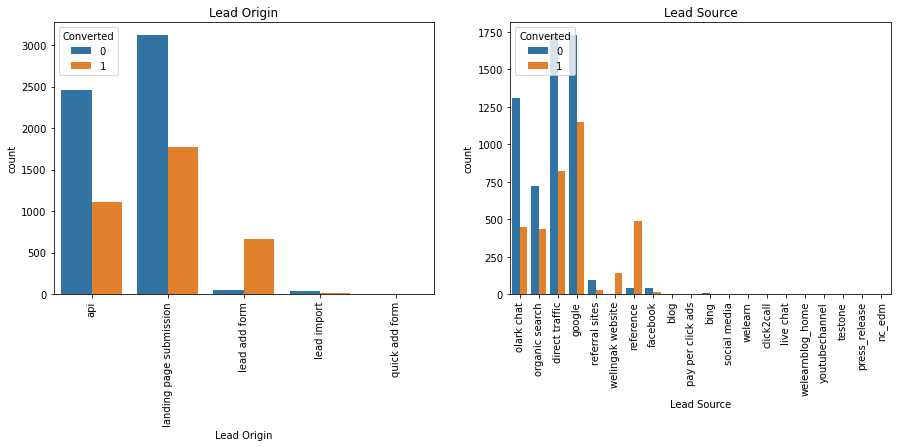

In [340]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.show()

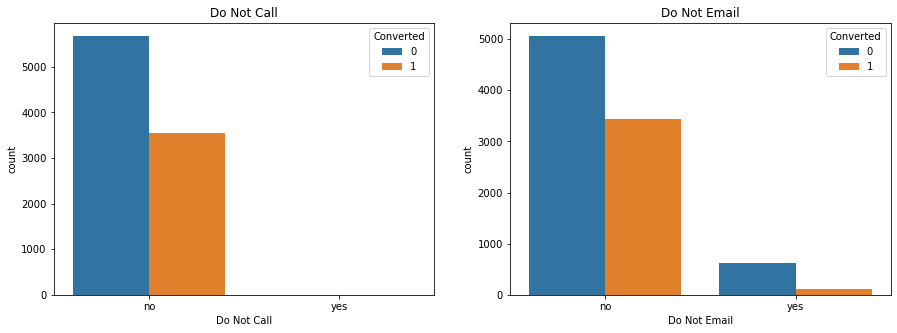

In [341]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Call', hue='Converted', data= Lead_df)
plt.title('Do Not Call')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Email', hue='Converted', data= Lead_df)
plt.title('Do Not Email')

plt.show()

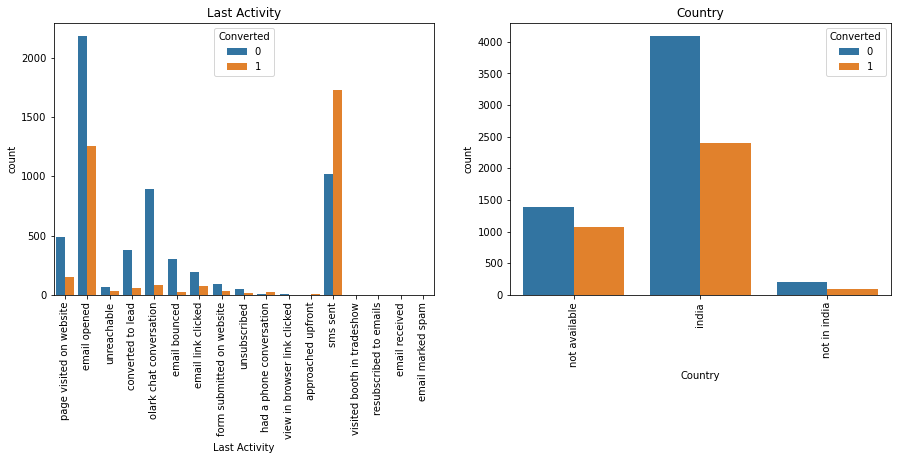

In [342]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.show()

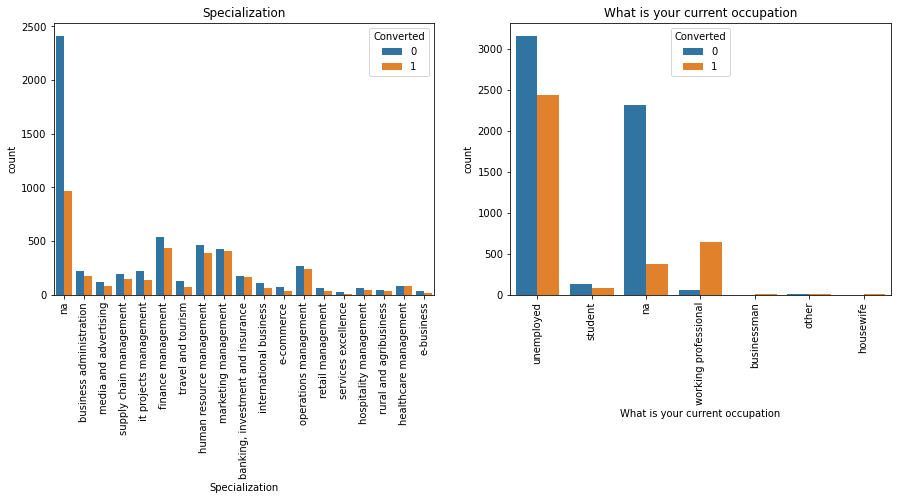

In [343]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.show()

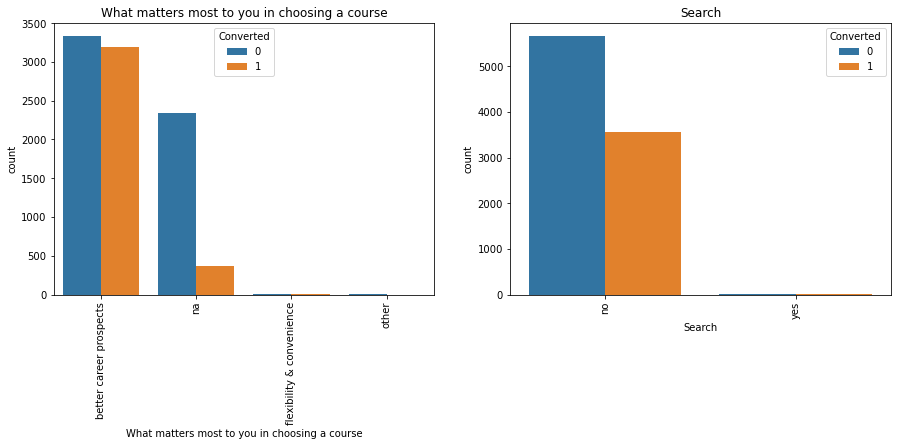

In [344]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.show()

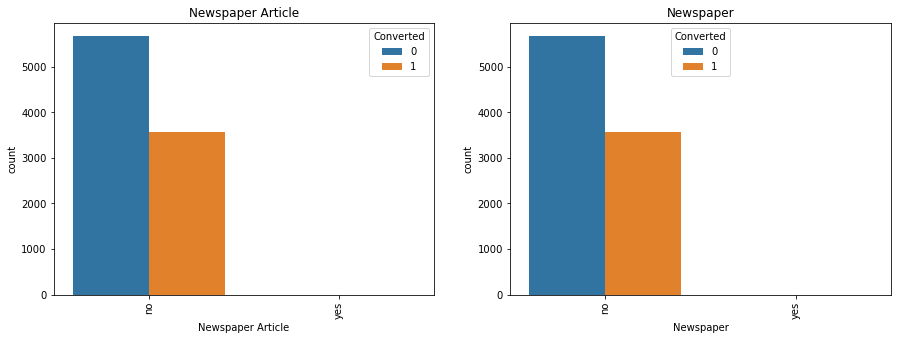

In [345]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='Newspaper', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.show()

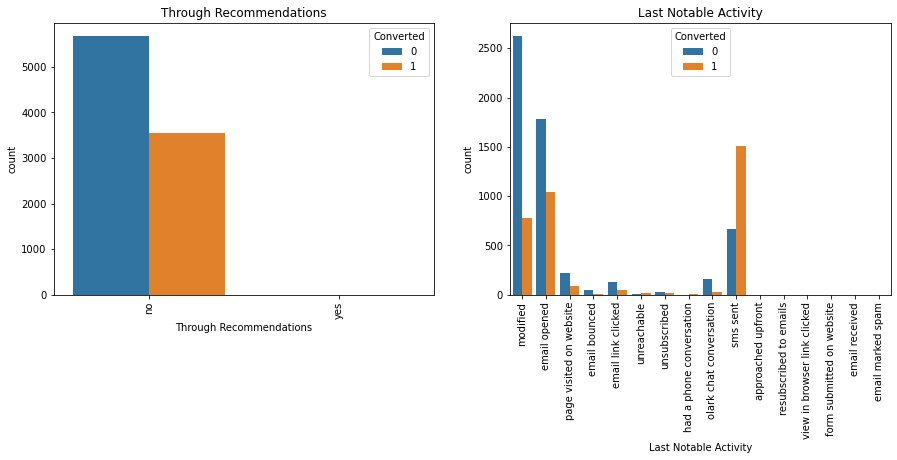

In [346]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='Last Notable Activity', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

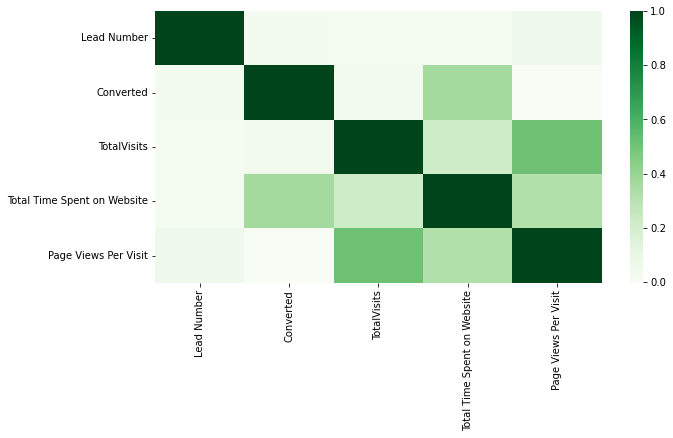

In [347]:
#Checking for Correlation
plt.figure(figsize=(10,5))
sns.heatmap(Lead_df.corr(),cmap="Greens")
plt.show()

In [348]:
Lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()
#Clearly no major Outliers

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,251.000000,2272.000000,55.000000


In [349]:
# Creating dummy variables
dummy = pd.get_dummies(Lead_df[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

Lead_df_dummy = pd.concat([Lead_df, dummy], axis=1)

Lead_df_dummy.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,0,0,1,0,0,0,0,0,0,0
1,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,0,0,1,0,0,0,0,0,0,0
4,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,0,0,1,0,0,0,0,0,0,0


In [350]:
Lead_df_dummy.shape

(9240, 105)

In [351]:
Lead_df_dummy = Lead_df_dummy.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity','Lead Profile', 'City', 'How did you hear about X Education','Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit'],axis=1)

Lead_df_dummy.head()

,Converted,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [352]:
#Test-train split
from sklearn.model_selection import train_test_split

In [353]:
X = Lead_df_dummy.drop(['Converted'], 1)

X.head()

,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [354]:
y = Lead_df_dummy['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [355]:
#Splitting the data into train(70%) and test(30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [356]:
X_train.head()

,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3112,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8413,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2961,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2740,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


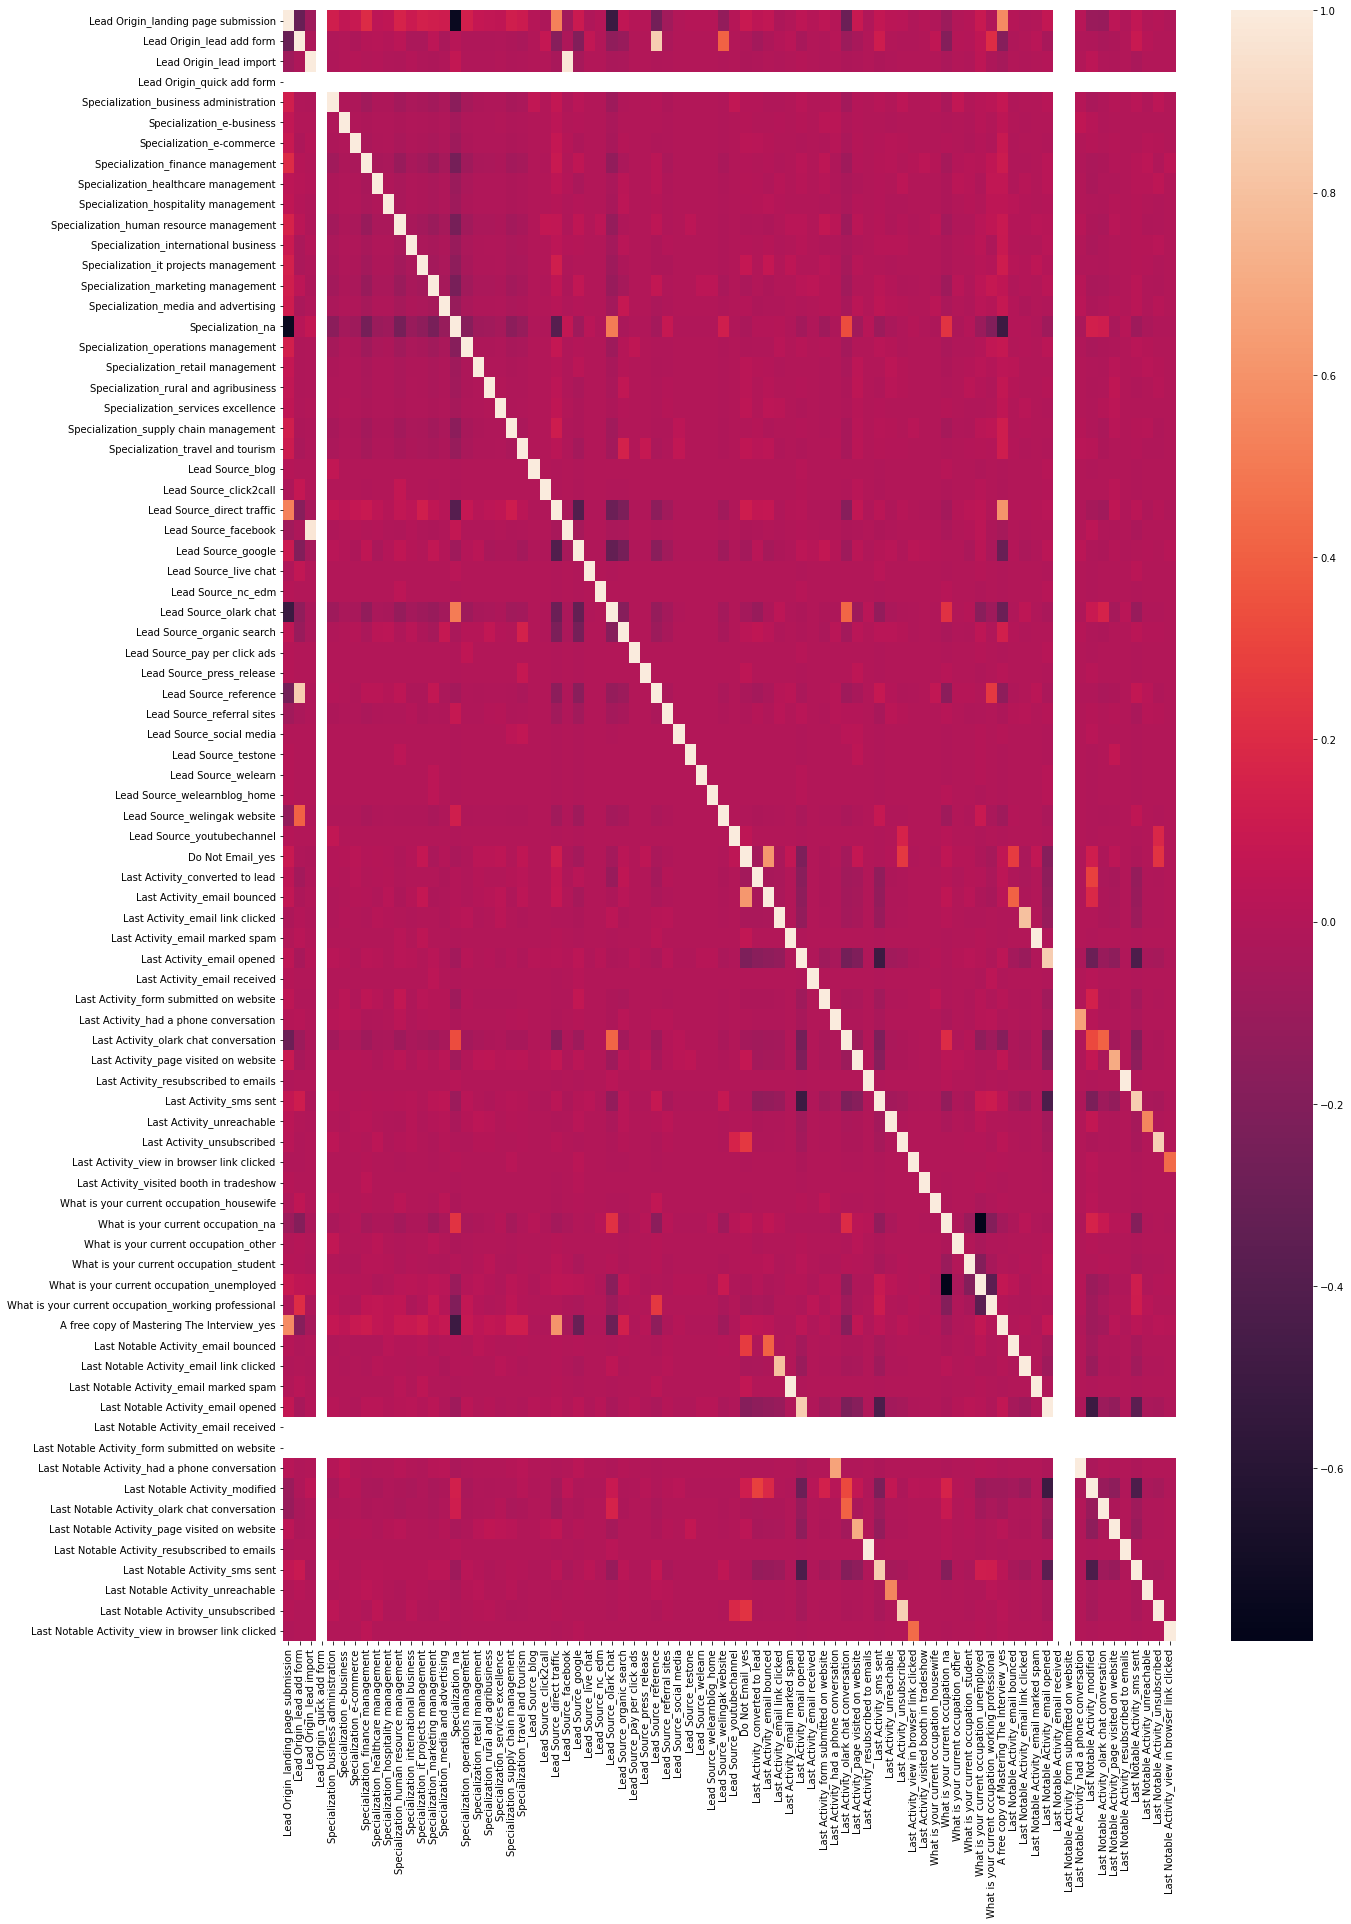

In [357]:
#Checking the correlation among variables
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

In [358]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [359]:
lr_model = LogisticRegression()

In [360]:
#rfe with 15 variables as output
rfe = RFE(lr_model, 15)
rfe = rfe.fit(X_train, y_train)

In [361]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 24),
 ('Lead Origin_quick add form', False, 64),
 ('Specialization_business administration', False, 44),
 ('Specialization_e-business', False, 34),
 ('Specialization_e-commerce', False, 38),
 ('Specialization_finance management', False, 61),
 ('Specialization_healthcare management', False, 41),
 ('Specialization_hospitality management', False, 51),
 ('Specialization_human resource management', False, 58),
 ('Specialization_international business', False, 37),
 ('Specialization_it projects management', False, 60),
 ('Specialization_marketing management', False, 63),
 ('Specialization_media and advertising', False, 43),
 ('Specialization_na', True, 1),
 ('Specialization_operations management', False, 62),
 ('Specialization_retail management', False, 26),
 ('Specialization_rural and agribusiness', False, 33),
 ('Specialization_services excellence', False, 49),
 (

In [362]:
col = X_train.columns[rfe.support_]

X_train = X_train[col]

In [363]:
#Model 1
X_train_sm = sm.add_constant(X_train)

Lr_model1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = Lr_model1.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3057.4
Date:                Mon, 19 Sep 2022   Deviance:                       6114.9
Time:                        14:11:04   Pearson chi2:                 6.67e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1900      0.104      1.819      0.069      -0.015       0.395
Lead Origin_landing page submission                     -1.0446      0.110     -9.534      0.000      -1.259      -0.830
Lead Origin_lead add form                                2.0171      0.197     10.241      0.000       1.631       2.403
Specialization_na                                       -1.0672      0.113     -9.453      0.000      -1.289      -0.846
Lead Source_welingak website                             2.8108      1.029      2.732      0.006       0.794       4.827
Do Not Email_yes                                        -1.6158      0.163     -9.940      0.000      -1.934      -1.297
Last Activity_email marked spam                         12.0403   1.46e+04      0.001      0.999   -2.86e+04    2.86e+04
Last Activity_olark chat conversation                   -1.0892      0.152     -7.149      0.000      -1.388      -0.791
Last Activity_sms sent                                   1.3923      0.068     20.449      0.000       1.259       1.526
What is your current occupation_housewife               22.2498   1.83e+04      0.001      0.999   -3.59e+04     3.6e+04
What is your current occupation_na                      -1.1650      0.080    -14.491      0.000      -1.323      -1.007
What is your current occupation_working professional     2.4609      0.176     13.999      0.000       2.116       2.805
Last Notable Activity_email marked spam                 12.0403   1.46e+04      0.001      0.999   -2.86e+04    2.86e+04
Last Notable Activity_had a phone conversation           2.9324      1.091      2.688      0.007       0.794       5.071
Last Notable Activity_unreachable                        2.0559      0.670      3.070      0.002       0.744       3.368
Last Notable Activity_unsubscribed                       1.4262      0.479      2.978      0.003       0.488       2.365
========================================================================================================================
"""

In [364]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,Last Activity_email marked spam,inf
11,Last Notable Activity_email marked spam,inf
3,Lead Source_welingak website,1.26
14,Last Notable Activity_unsubscribed,1.07
8,What is your current occupation_housewife,1.01
12,Last Notable Activity_had a phone conversation,1.00
13,Last Notable Activity_unreachable,1.00
4,Do Not Email_yes,0.59
6,Last Activity_olark chat conversation,0.31
7,Last Activity_sms sent,0.11


In [365]:
#vif has an inf value and hence dropping the first inf corresponding column

X_train.drop('Last Activity_email marked spam', axis = 1, inplace = True)

In [366]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif
#Now the vif values look good

,Features,VIF
3,Lead Source_welingak website,1.26
13,Last Notable Activity_unsubscribed,1.07
7,What is your current occupation_housewife,1.01
10,Last Notable Activity_email marked spam,1.01
11,Last Notable Activity_had a phone conversation,1.00
12,Last Notable Activity_unreachable,1.00
4,Do Not Email_yes,0.59
5,Last Activity_olark chat conversation,0.31
6,Last Activity_sms sent,0.11
8,What is your current occupation_na,0.08


In [367]:
#Model 2
X_train_sm = sm.add_constant(X_train)

Lr_model2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = Lr_model2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3057.4
Date:                Mon, 19 Sep 2022   Deviance:                       6114.9
Time:                        14:11:18   Pearson chi2:                 6.67e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1900      0.104      1.819      0.069      -0.015       0.395
Lead Origin_landing page submission                     -1.0446      0.110     -9.534      0.000      -1.259      -0.830
Lead Origin_lead add form                                2.0171      0.197     10.241      0.000       1.631       2.403
Specialization_na                                       -1.0672      0.113     -9.453      0.000      -1.289      -0.846
Lead Source_welingak website                             2.8108      1.029      2.732      0.006       0.794       4.827
Do Not Email_yes                                        -1.6158      0.163     -9.940      0.000      -1.934      -1.297
Last Activity_olark chat conversation                   -1.0892      0.152     -7.149      0.000      -1.388      -0.791
Last Activity_sms sent                                   1.3923      0.068     20.449      0.000       1.259       1.526
What is your current occupation_housewife               22.2498   1.83e+04      0.001      0.999   -3.59e+04     3.6e+04
What is your current occupation_na                      -1.1650      0.080    -14.491      0.000      -1.323      -1.007
What is your current occupation_working professional     2.4609      0.176     13.999      0.000       2.116       2.805
Last Notable Activity_email marked spam                 24.0806   2.92e+04      0.001      0.999   -5.72e+04    5.73e+04
Last Notable Activity_had a phone conversation           2.9324      1.091      2.688      0.007       0.794       5.071
Last Notable Activity_unreachable                        2.0559      0.670      3.070      0.002       0.744       3.368
Last Notable Activity_unsubscribed                       1.4262      0.479      2.978      0.003       0.488       2.365
========================================================================================================================
"""

In [368]:
#There are 2 p values having value as 0.999. Dropping the first value
X_train.drop('Last Notable Activity_email marked spam', axis = 1, inplace = True)

In [369]:
#Model 3
X_train_sm = sm.add_constant(X_train)

Lr_model3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = Lr_model3.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3060.4
Date:                Mon, 19 Sep 2022   Deviance:                       6120.8
Time:                        14:11:29   Pearson chi2:                 6.67e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1924      0.104      1.843      0.065      -0.012       0.397
Lead Origin_landing page submission                     -1.0454      0.110     -9.545      0.000      -1.260      -0.831
Lead Origin_lead add form                                2.0247      0.197     10.281      0.000       1.639       2.411
Specialization_na                                       -1.0697      0.113     -9.478      0.000      -1.291      -0.849
Lead Source_welingak website                             2.7987      1.029      2.721      0.007       0.783       4.815
Do Not Email_yes                                        -1.5846      0.161     -9.856      0.000      -1.900      -1.269
Last Activity_olark chat conversation                   -1.0897      0.152     -7.153      0.000      -1.388      -0.791
Last Activity_sms sent                                   1.3892      0.068     20.417      0.000       1.256       1.523
What is your current occupation_housewife               22.2459   1.83e+04      0.001      0.999   -3.59e+04    3.59e+04
What is your current occupation_na                      -1.1655      0.080    -14.503      0.000      -1.323      -1.008
What is your current occupation_working professional     2.4583      0.176     13.988      0.000       2.114       2.803
Last Notable Activity_had a phone conversation           2.9309      1.091      2.687      0.007       0.793       5.069
Last Notable Activity_unreachable                        2.0528      0.669      3.068      0.002       0.742       3.364
Last Notable Activity_unsubscribed                       1.3937      0.478      2.913      0.004       0.456       2.331
========================================================================================================================
"""

In [370]:
#dropping the other column having p value as 0.999
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [371]:
#Model 4
X_train_sm = sm.add_constant(X_train)

Lr_model4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = Lr_model4.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3063.1
Date:                Mon, 19 Sep 2022   Deviance:                       6126.3
Time:                        14:11:34   Pearson chi2:                 6.68e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1952      0.104      1.870      0.062      -0.009       0.400
Lead Origin_landing page submission                     -1.0443      0.110     -9.537      0.000      -1.259      -0.830
Lead Origin_lead add form                                2.0342      0.197     10.338      0.000       1.649       2.420
Specialization_na                                       -1.0715      0.113     -9.497      0.000      -1.293      -0.850
Lead Source_welingak website                             2.7893      1.029      2.712      0.007       0.773       4.805
Do Not Email_yes                                        -1.5869      0.161     -9.869      0.000      -1.902      -1.272
Last Activity_olark chat conversation                   -1.0909      0.152     -7.160      0.000      -1.389      -0.792
Last Activity_sms sent                                   1.3866      0.068     20.383      0.000       1.253       1.520
What is your current occupation_na                      -1.1668      0.080    -14.522      0.000      -1.324      -1.009
What is your current occupation_working professional     2.4552      0.176     13.972      0.000       2.111       2.800
Last Notable Activity_had a phone conversation           2.9274      1.091      2.683      0.007       0.789       5.066
Last Notable Activity_unreachable                        2.0501      0.669      3.064      0.002       0.739       3.362
Last Notable Activity_unsubscribed                       1.3928      0.478      2.911      0.004       0.455       2.331
========================================================================================================================
"""

In [372]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3112    0.299616
8413    0.631216
2961    0.902858
24      0.548642
2740    0.299616
489     0.122689
9116    0.624863
4176    0.299616
8537    0.299616
6267    0.299616
dtype: float64

In [373]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Probability
3112,0,0.299616
8413,1,0.631216
2961,1,0.902858
24,1,0.548642
2740,0,0.299616


In [374]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted
3112,0,0.299616,0
8413,1,0.631216,1
2961,1,0.902858,1
24,1,0.548642,1
2740,0,0.299616,0


In [375]:
from sklearn import metrics

In [376]:
confusion_matrix1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion_matrix1

array([[3375,  579],
       [ 933, 1581]], dtype=int64)

In [377]:
#Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
#Accuracy is around 77% 

0.7662337662337663

In [378]:
true_positive = confusion_matrix1[1,1]
true_negative = confusion_matrix1[0,0]
false_positive = confusion_matrix1[0,1]
false_negative = confusion_matrix1[1,0]

In [379]:
true_positive/(true_positive+false_negative)
#Sensitivity is around 63%

0.6288782816229117

In [380]:
true_negative/(true_negative+false_positive)
#Specificity is around 85%

0.8535660091047041

In [381]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(15, 5))
    plt.plot( fpr, tpr, label='Area Under ROC is %0.2f' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [382]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Conversion_Probability, drop_intermediate = False )

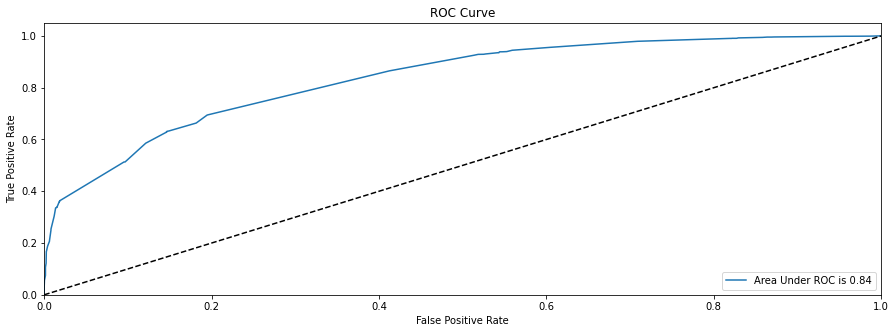

In [383]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

#Area under ROC Curve is 0.84

In [384]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3112,0,0.299616,0,1,1,1,0,0,0,0,0,0,0
8413,1,0.631216,1,1,1,1,1,1,1,1,0,0,0
2961,1,0.902858,1,1,1,1,1,1,1,1,1,1,1
24,1,0.548642,1,1,1,1,1,1,1,0,0,0,0
2740,0,0.299616,0,1,1,1,0,0,0,0,0,0,0


In [385]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i,accuracy,sensitivity,specificity ]
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.388683,1.000000,0.000000
0.1,0.1,0.494434,0.990453,0.179059
0.2,0.2,0.643630,0.938345,0.456247
0.3,0.3,0.762214,0.694511,0.805260
0.4,0.4,0.767007,0.630867,0.853566
0.5,0.5,0.766234,0.628878,0.853566
0.6,0.6,0.764842,0.586714,0.878098
0.7,0.7,0.740724,0.362371,0.981285
0.8,0.8,0.734075,0.339698,0.984825
0.9,0.9,0.703618,0.250199,0.991907


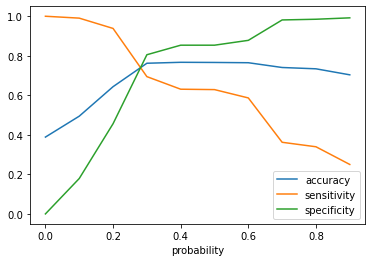

In [386]:
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()
#the probability value is around 0.3

In [387]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3112,0,0.299616,0,1,1,1,0,0,0,0,0,0,0,0
8413,1,0.631216,1,1,1,1,1,1,1,1,0,0,0,1
2961,1,0.902858,1,1,1,1,1,1,1,1,1,1,1,1
24,1,0.548642,1,1,1,1,1,1,1,0,0,0,0,1
2740,0,0.299616,0,1,1,1,0,0,0,0,0,0,0,0


In [388]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
#Accuracy is around 76% 

0.7622139764996908

In [389]:
confusion_matrix2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_matrix2

array([[3184,  770],
       [ 768, 1746]], dtype=int64)

In [390]:
true_positive = confusion_matrix2[1,1]
true_negative = confusion_matrix2[0,0]
false_positive = confusion_matrix2[0,1]
false_negative = confusion_matrix2[1,0]

In [391]:
true_positive/(true_positive+false_negative)
#Sensitivity is around 69%

0.6945107398568019

In [392]:
true_negative/(true_negative+false_positive)
#Specificity is around 80%

0.8052604957005564

In [393]:
#Prediction on Test Set
col = X_train.columns

X_test = X_test[col]

In [394]:
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,Lead Origin_landing page submission,Lead Origin_lead add form,Specialization_na,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_na,What is your current occupation_working professional,Last Notable Activity_had a phone conversation,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed
567,1.0,1,0,0,0,0,0,0,0,0,0,0,0
2303,1.0,1,0,0,0,0,0,0,0,0,0,0,0
1523,1.0,0,0,0,0,0,0,0,0,0,0,0,0
6923,1.0,1,0,0,0,0,0,0,0,0,0,0,0
7841,1.0,1,0,0,0,0,0,0,0,0,0,0,0


In [395]:
X_test_sm.shape

(2772, 13)

In [396]:
#Predicting and converting into a dataframe
y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

In [397]:
#Removing the index and append the dataframes 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [398]:
y_pred_final.head()

,Converted,0
0,0,0.299616
1,0,0.299616
2,0,0.548642
3,0,0.299616
4,0,0.299616


In [399]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})
y_pred_final.head()

,Converted,Conversion_Probability
0,0,0.299616
1,0,0.299616
2,0,0.548642
3,0,0.299616
4,0,0.299616


In [400]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final

,Converted,Conversion_Probability,final_predicted
0,0,0.299616,0
1,0,0.299616,0
2,0,0.548642,1
3,0,0.299616,0
4,0,0.299616,0
...,...,...,...
2767,0,0.341521,1
2768,0,0.293940,0
2769,0,0.299616,0
2770,0,0.624863,1


In [401]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)
#Accuracy is around 76% 

0.7611832611832612

In [402]:
confusion_test_matrix1 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion_test_matrix1

array([[1396,  329],
       [ 333,  714]], dtype=int64)

In [403]:
true_positive = confusion_test_matrix1[1,1]
true_negative = confusion_test_matrix1[0,0]
false_positive = confusion_test_matrix1[0,1]
false_negative = confusion_test_matrix1[1,0]

In [404]:
true_positive/(true_positive+false_negative)
#Sensitivity is around 68%

0.6819484240687679

In [405]:
true_negative/(true_negative+false_positive)
#Specificity is around 80%

0.8092753623188406

In [406]:
confusion_test_matrix2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion_test_matrix2

array([[3375,  579],
       [ 933, 1581]], dtype=int64)

In [407]:
true_positive = confusion_test_matrix2[1,1]
true_negative = confusion_test_matrix2[0,0]
false_positive = confusion_test_matrix2[0,1]
false_negative = confusion_test_matrix2[1,0]

In [408]:
true_positive/(true_positive+false_positive)
#Precision is around 73%

0.7319444444444444

In [409]:
true_positive/(true_positive+false_negative)
#Recall is around 63%

0.6288782816229117

In [ ]:
#Conclusion:
#The Most important variables are:
#Lead origin:
#	landing page submission
#	lead add form	
#	welingak website
#Last Activity:
#	olark chat conversation
#	sms sent
#Current Occupation is working professional
#Last Notable Activity:
#	unreachable
#	unsubscribed
#	had a phone conversation